In [3]:
'''
Problem Statement: Build the linear regression model using scikit learn in boston data to predict 'Price' based on other
dependent variable.
'''
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

# Load boston data
print("The attributes of boston data are:",boston.keys())

The attributes of boston data are: dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [6]:
#  Description of boston data
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
# Fetures (columns) of boston data
print("The features of boston data are: ",boston.feature_names)

The features of boston data are:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
# Structure of boston data
print("Strutcure of boston housing data\n","No. Of rows in boston data : ",boston.data.shape[0],"\n No. Of columns in boston data :",boston.data.shape[1])

Strutcure of boston housing data
 No. Of rows in boston data :  506 
 No. Of columns in boston data : 13


In [10]:
# view first 5 target values of boston data
print("First 5 target values of boston data : ",boston.target[:5])

First 5 target values of boston data :  [24.  21.6 34.7 33.4 36.2]


In [11]:
# add these target prices to the bos data frame.
bos['PRICE'] = boston.target
bos['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [12]:
# Transform boston data into Pandas data frame 

df_Boston= pd.DataFrame(boston.data, columns=boston.feature_names)
print("Glimpse of Boston data")
df_Boston.head(3)

Glimpse of Boston data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [13]:
# Add target  into boston data frame as price

df_Boston['PRICE']=boston.target

print("Boston Housing Data including Price column")
df_Boston.head(3)

Boston Housing Data including Price column


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [21]:
'''
Linear regression with Boston housing data using least square method
now apply sklearn linear regression model
from sklearn.linear_model import LinearRegression as Linear_Regression
Linear regression model requires two input paramter " X " (training data), " y " (Target variable) , 
thus split boston dataframe into X & y variable
'''
from sklearn.linear_model import LinearRegression as Linear_Regression
# "Features Data Frame (df_Boston_X)"
df_Boston_X=df_Boston.iloc[:,:-1]
# "Target Data Frame (df_Boston_y)"
df_Boston_y=df_Boston.iloc[:,-1:]
print("The Training data (X) are \n", df_Boston_X.head(2))
print("\nThe Target variable (Y) are \n", df_Boston_y.head(2))

The Training data (X) are 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14  

The Target variable (Y) are 
    PRICE
0   24.0
1   21.6


In [22]:
# Fit the Training Data (X) and Target variable into Linear regression model

linear_regmodel = Linear_Regression()
# Fit the data
linear_regmodel.fit(df_Boston_X,df_Boston_y)

# Calculate the Returns the coefficient of determination (R^2)

linear_regmodel_Rsquare =linear_regmodel.score(df_Boston_X,df_Boston_y)

# Prediction of Y (Target variable) based upon Training data(X)

linear_regmodel_y_pricepredicted= linear_regmodel.predict(df_Boston_X)

print("The coefficient of determination (R^2) R-square: ",linear_regmodel_Rsquare,"\n")
print("The Estimated Intercept: ",linear_regmodel.intercept_[0] , "\n")
print("No. of Estimated coefficients :",len(linear_regmodel.coef_[0]), "\n" )
print("The Predicted Prices(Y) (first 5 values) based upon upon features: \n",linear_regmodel_y_pricepredicted[0:5])

The coefficient of determination (R^2) R-square:  0.7406077428649428 

The Estimated Intercept:  36.491103280361266 

No. of Estimated coefficients : 13 

The Predicted Prices(Y) (first 5 values) based upon upon features: 
 [[30.00821269]
 [25.0298606 ]
 [30.5702317 ]
 [28.60814055]
 [27.94288232]]


In [23]:
# Features ( independent variables) and their estimates coefficients

df_linear_regmodel_coef= pd.DataFrame(list(zip(df_Boston_X.columns, linear_regmodel.coef_[0])), columns=['Features','Estimated_Coefficients'])
print("Features ( independent variables) and their estimates coefficients")
df_linear_regmodel_coef

Features ( independent variables) and their estimates coefficients


,Features,Estimated_Coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Correlation between Target variable PRICE and Fatures ( independent variables) of BOSTON Housing Data


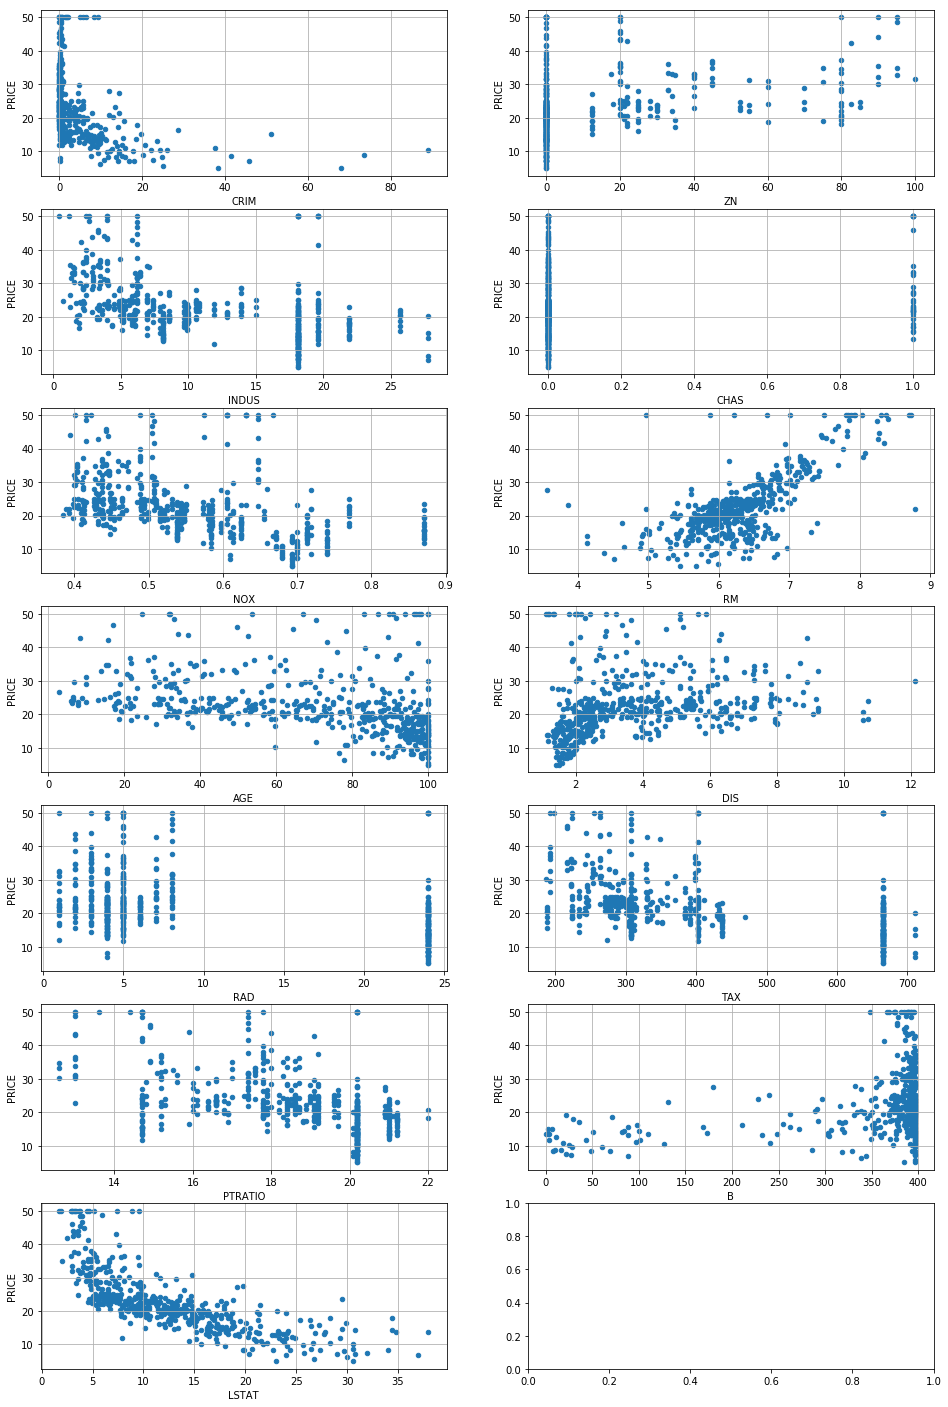

In [27]:

print("Correlation between Target variable "'PRICE'" and Fatures ( independent variables) of BOSTON Housing Data")
fig, axs = plt.subplots(7, 2 , sharey=False)
df_Boston.plot(kind='scatter', x=df_Boston.columns[0], y='PRICE', ax=axs[0][0] , figsize=(16,25) , grid=True )
df_Boston.plot(kind='scatter', x=df_Boston.columns[1], y='PRICE', ax=axs[0][1], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[2], y='PRICE', ax=axs[1][0], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[3], y='PRICE', ax=axs[1][1], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[4], y='PRICE', ax=axs[2][0], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[5], y='PRICE', ax=axs[2][1], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[6], y='PRICE', ax=axs[3][0], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[7], y='PRICE', ax=axs[3][1], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[8], y='PRICE', ax=axs[4][0], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[9], y='PRICE', ax=axs[4][1], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[10], y='PRICE', ax=axs[5][0], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[11], y='PRICE', ax=axs[5][1], grid=True)
df_Boston.plot(kind='scatter', x=df_Boston.columns[12], y='PRICE', ax=axs[6][0], grid=True)
# df_Boston.plot(kind='scatter', x=df_Boston.columns[13], y='PRICE', ax=axs[6][1])
plt.show()

Plot between Existing Price Data and Predictd price


<Figure size 2160x8640 with 0 Axes>

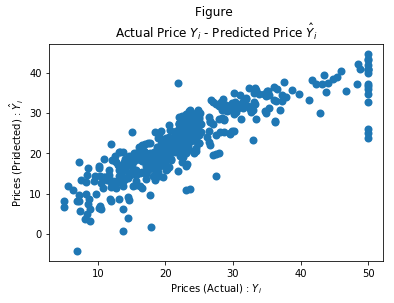

<Figure size 2160x8640 with 0 Axes>

In [31]:
# Scatter plot between Existing Price Data and Predictd price data
print("Plot between Existing Price Data and Predictd price")
fig = plt.figure()
plt.title('Figure \n' + r'Actual Price $Y_i$ - Predicted Price $\hat{Y}_i$')
plt.scatter(df_Boston['PRICE'],linear_regmodel.predict(df_Boston_X) ,  linewidths=2)
plt.xlabel("Prices (Actual) : $Y_i$ ")
plt.ylabel("Prices (Pridected) : $\hat{Y}_i$ ")

plt.figure(figsize=(30,120))

In [33]:
# Calulation of Mean square error is a measure of how close a fitted line is to data points

meanSquarerror_full = np.mean((df_Boston['PRICE'] - linear_regmodel.predict(df_Boston_X).flatten())**2)
print("The Mean Squared Error is :",meanSquarerror_full)

The Mean Squared Error is : 21.897779217687486


In [34]:
# Residual sum of squares

print("Residual sum of squares : ")
print(np.sum((df_Boston.PRICE - linear_regmodel.predict(df_Boston_X).flatten()) ** 2))

Residual sum of squares : 
11080.276284149873


In [35]:
# Import regression modules ols stands for Ordinary least squares
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Columns of boston datadf
df_Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [36]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
lm_boston_ols = ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + PRICE ', data=df_Boston).fit()
print(" Statistical analysis of Boston data is \n")
print(lm_boston_ols.summary())

 Statistical analysis of Boston data is 

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.076e+30
Date:                Sun, 14 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:09:23   Log-Likelihood:                 15147.
No. Observations:                 506   AIC:                        -3.026e+04
Df Residuals:                     491   BIC:                        -3.020e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

Text(0.5,1,'Relationship between Original Prices and Predicted Values')

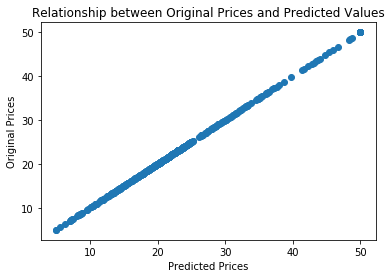

In [37]:
# Scatter plot between the predicted prices, available in m.fittedvalues and the original prices
plt.scatter(lm_boston_ols.fittedvalues, df_Boston.PRICE)
plt.xlabel("Predicted Prices")
plt.ylabel("Original Prices")
plt.title("Relationship between Original Prices and Predicted Values")

In [38]:
print("The values of R-sqaure is :",lm_boston_ols.rsquared )
print("The values of adjusted R-sqaure is :",lm_boston_ols.rsquared_adj)

The values of R-sqaure is : 1.0
The values of adjusted R-sqaure is : 1.0
